In [1]:
import math as m
import numpy as np
import scipy as sp
from scipy import stats as sps
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



In [2]:
# Vector media
uz = np.zeros(3)
# Matriz de covarianza
Cz = np.array([[1,0,0],[0,5/2,-1/2],[0,-1/2,5/2]])
# Cantidad de realizacion 
N=int(1e4)

In [3]:
#Creo N realizaciones del vector Z~N(uz,Cz), de Cz saca la dimension de Z
Z = np.random.multivariate_normal(uz,Cz,N)

#Creo ejes de 500 puntos entre -10 a 10
x=np.linspace(-10,10,500)
y=np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y) # crea matrices de coordenadas en base a arreglos np

#creo matriz de puntos donde voy a evaluar la funcion densidad
pos = np.empty(X.shape + (3,))
pos[:,:,0] = X; pos[:,:,1]=Y

rv = sps.multivariate_normal(uz,Cz) #aca va a estar la funcion densidad como metodo



In [4]:
# Calculo la varianza de cada componente y obtengo la diagonal de la matriz de covarianza

varZ1 = np.var(Z[:,0]) # [elementos de la lista,elemento del array]
varZ2 = np.var(Z[:,1])
varZ3 = np.var(Z[:,2])

In [1]:
## CUADRADOS MINIMOS
##Toma dos arreglos con los puntos de X y de Y respectivamente 
##devuelve una tupla con la pendiente y la ordenada de la recta de regrecion
def LR(x,y):  
  A = np.sum(((x-np.average(x))*(y-np.average(y))))/np.sum(np.power((x-np.average(x)),2))
  B = np.average(y)-A*np.average(x)
  return (A,B)

In [10]:
# Calculo coeficientes de correlacion r12, r13, r23

r12, b = LR(Z[:,0],Z[:,1]) # como estimo el coef de correlacion?
r13, b = LR(Z[:,0],Z[:,2])
r23, b = LR(Z[:,1],Z[:,2])
# lo estime haciendo la pendiente de la regresion lineal de las realizaciones

# Armo matriz estimada
CovEstZ=[
    [varZ1, r12*np.sqrt(varZ1)*np.sqrt(varZ2), r13*np.sqrt(varZ1)*np.sqrt(varZ3)],
    [r12*np.sqrt(varZ2)*np.sqrt(varZ1),varZ2, r23*np.sqrt(varZ2)*np.sqrt(varZ3)],
    [r13*np.sqrt(varZ3)*np.sqrt(varZ1), r23*np.sqrt(varZ3)*np.sqrt(varZ2), varZ3]
]

np.round(CovEstZ,2)


array([[ 0.99, -0.02,  0.01],
       [-0.02,  2.55, -0.49],
       [ 0.01, -0.49,  2.52]])

AttributeError: 'AxesSubplot' object has no attribute 'plot_surface'

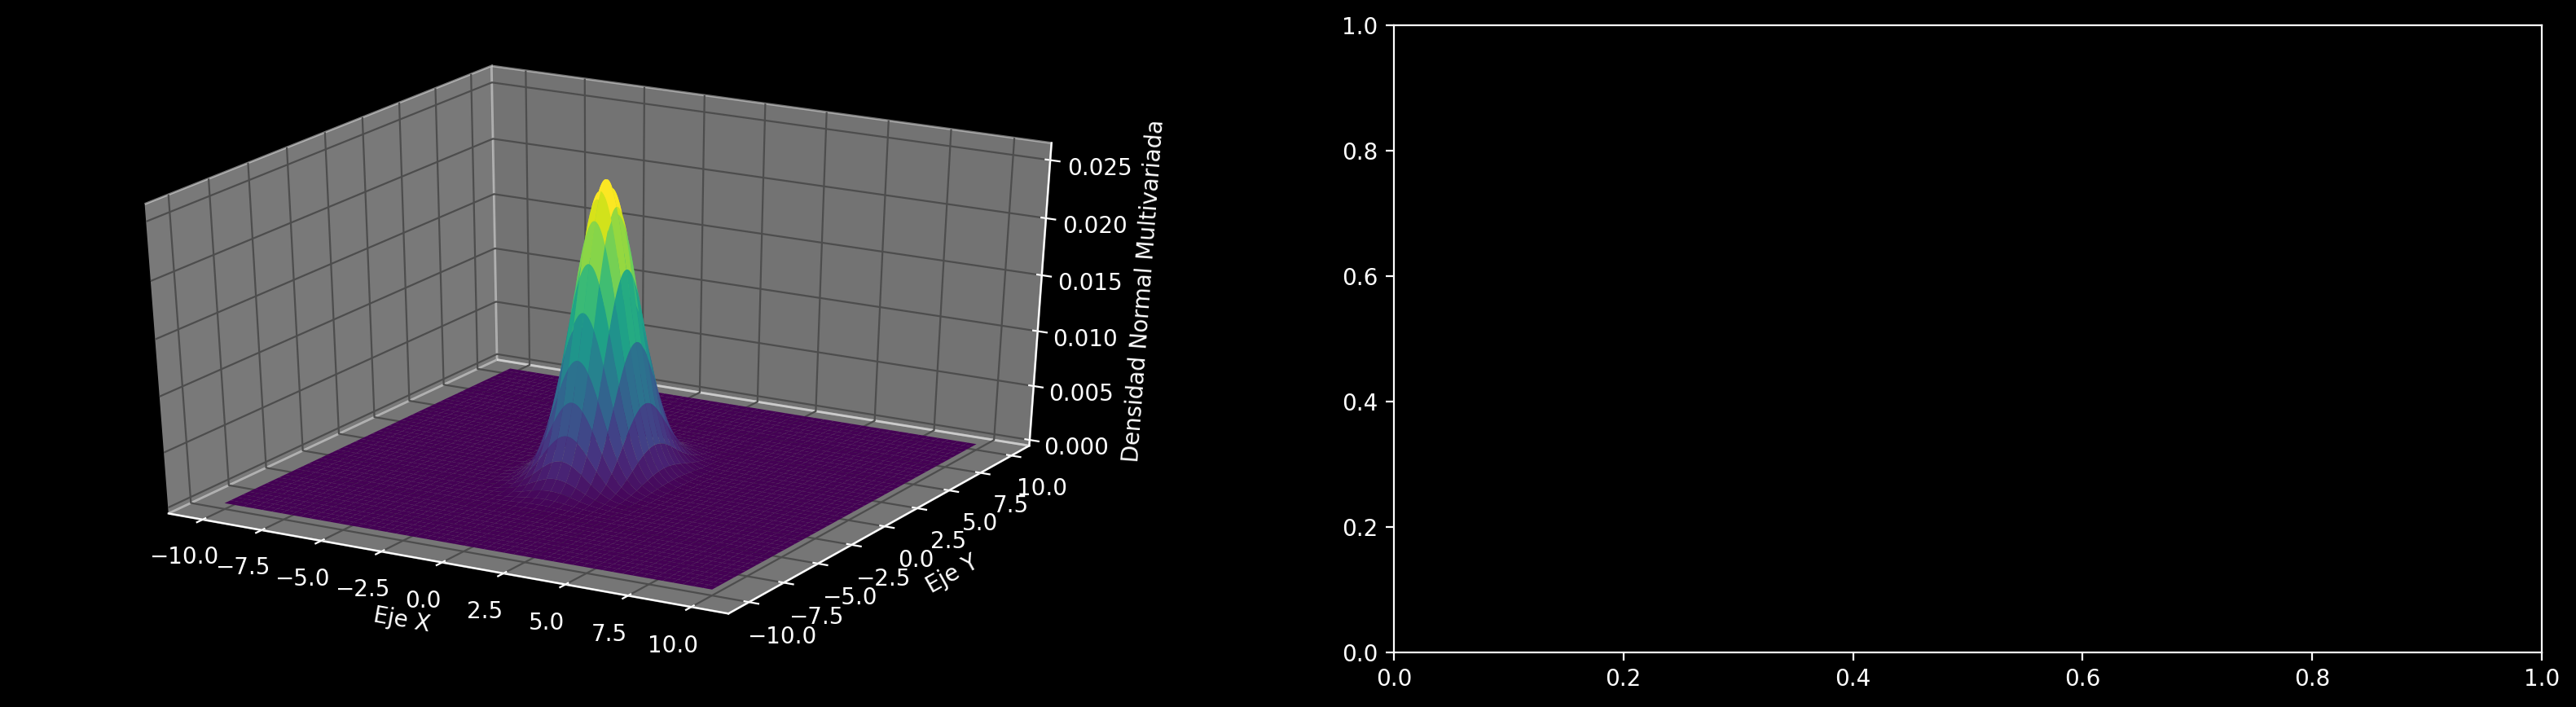

In [2]:
#Grafico

fig = plt.figure(figsize= (20,5))

ax = fig.add_subplot(1,2,1,projection = '3d')
ax.plot_surface(X,Y,rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Densidad Normal Multivariada')

ax1 = fig.add_subplot(1,2,2)
ax1.plot_surface(z[:,0],Z[:,1],Z[:,2],'.')
ax1.grid(True)
plt.show()

#en realidad no puedo graficar densidad de 3 dimensiones